In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf


In [2]:
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\spectrogram_images'


In [3]:
#Checking number of spectrograms in each instrument folder

# Initialize dictionaries to store subfolder names and their corresponding spectrogram counts
subfolder_dict = {}
spectrogram_count_dict = {}

# Loop through all items in the directory
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    
    # Check if the item is a subfolder
    if os.path.isdir(item_path):
        subfolder_dict[item] = item_path
        
        # Count the number of spectrogram images in the subfolder
        spectrogram_count = len([f for f in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, f))])
        spectrogram_count_dict[item] = spectrogram_count

# Print the subfolders and their corresponding spectrogram counts
for subfolder, count in spectrogram_count_dict.items():
    print(f"Subfolder '{subfolder}' contains {count} spectrogram images.")


Subfolder 'flute' contains 451 spectrogram images.
Subfolder 'guitar_acoustic' contains 637 spectrogram images.
Subfolder 'piano' contains 721 spectrogram images.
Subfolder 'trumpet' contains 577 spectrogram images.
Subfolder 'violin' contains 580 spectrogram images.


C:\Users\user\AppData\Local\Temp\ipykernel_21204\1466670906.py:58: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


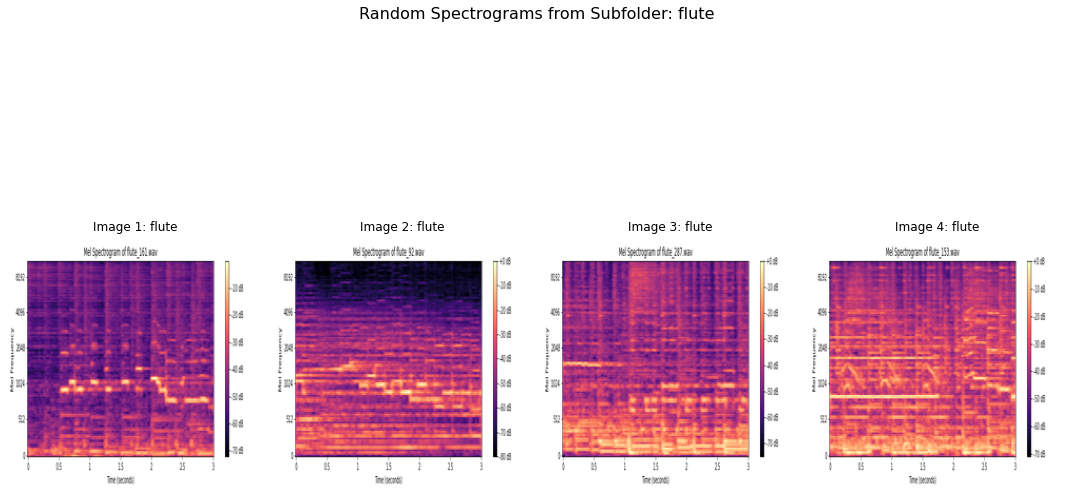

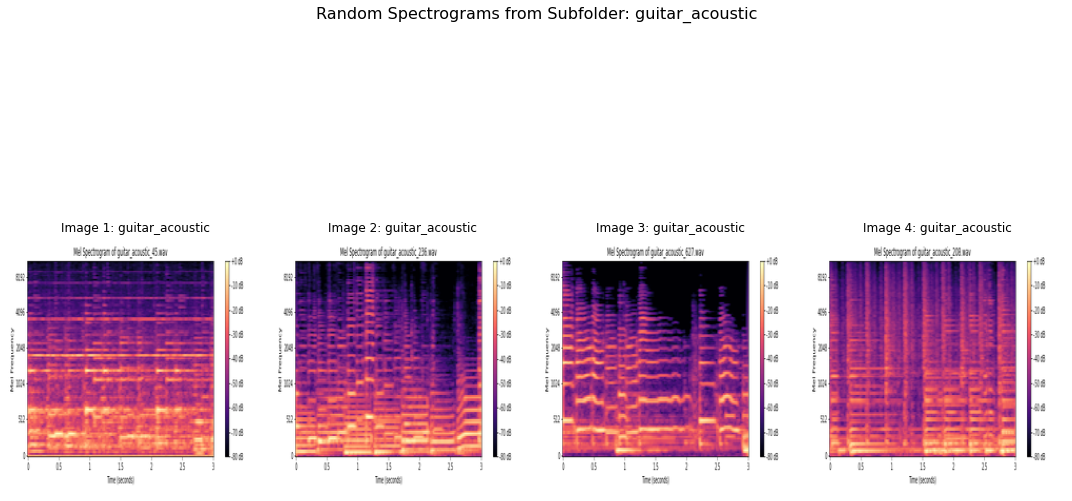

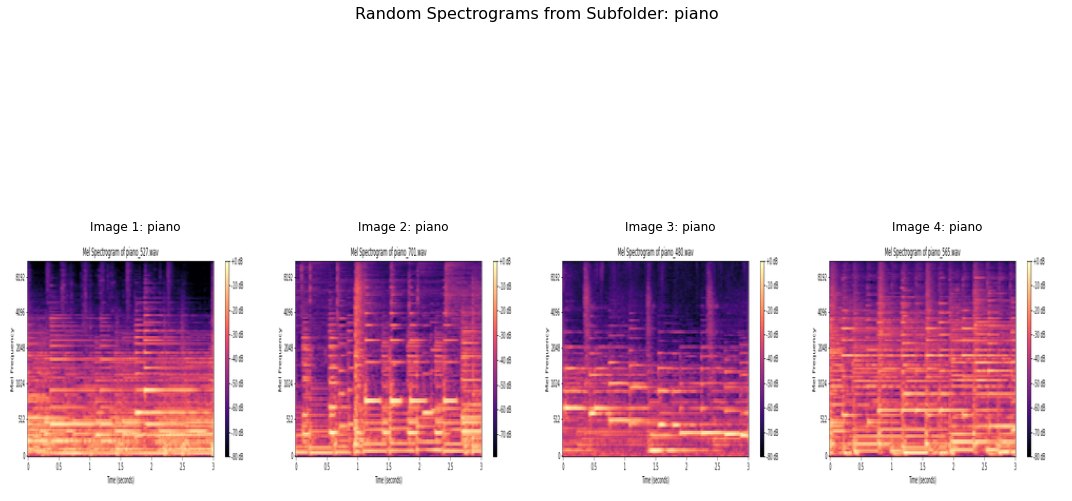

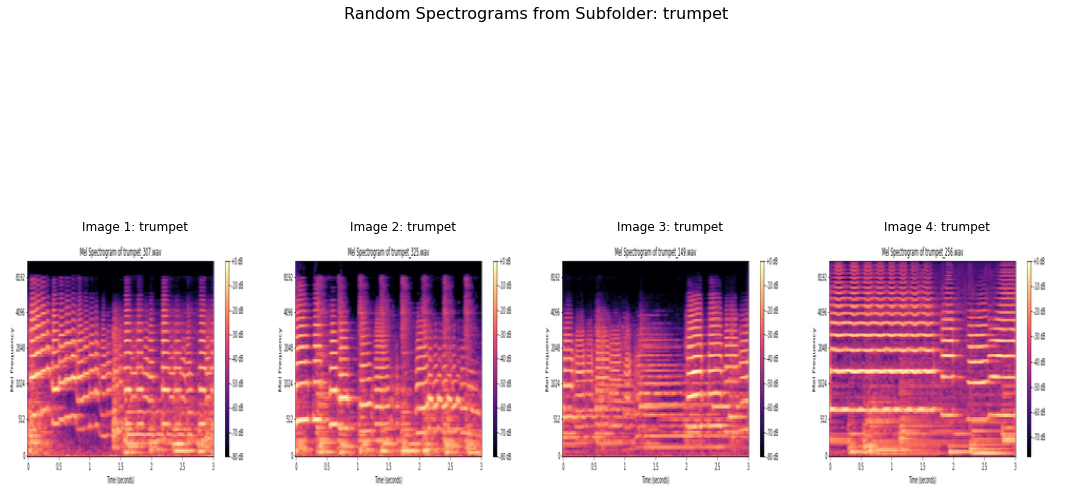

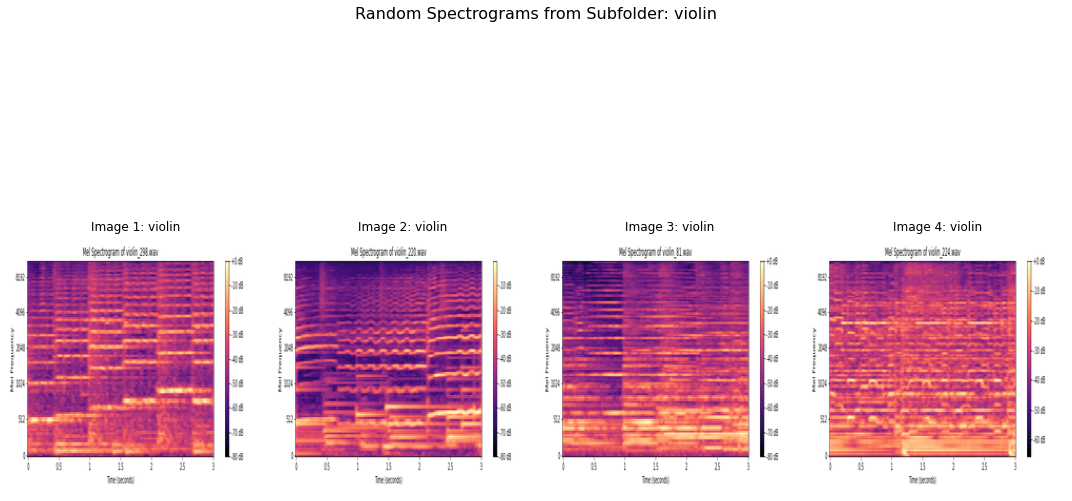

In [4]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Input folder containing the spectrograms
input_folder = 'C:\\Users\\user\\Desktop\\capstone\\spectrogram_images'

# Target size for resizing the images
target_size = (244, 244)

# Function to resize and rename the image using only the subfolder name
def resize_and_rename_image(file_path, class_name):
    # Open the image using PIL
    img = Image.open(file_path)
    
    # Resize the image to the target size
    img_resized = img.resize(target_size, Image.ANTIALIAS)
    
    # Get only the subfolder name without any additional text
    new_file_name = class_name + ".png"
    
    return img_resized, new_file_name

# Dictionary to store subfolder names and their corresponding image paths
subfolder_dict = {}

# Loop through all items in the input folder
for item in os.listdir(input_folder):
    item_path = os.path.join(input_folder, item)
    
    # Check if the item is a subfolder
    if os.path.isdir(item_path):
        subfolder_dict[item] = []
        class_name = item  # Get the subfolder name as the class name
        
        # Loop through all files in the subfolder
        for file_name in os.listdir(item_path):
            file_path = os.path.join(item_path, file_name)
            subfolder_dict[item].append(file_path)

# Function to randomly select 4 images from each subfolder and plot them
def plot_random_images(subfolder_dict):
    num_images_per_subfolder = 4
    
    for subfolder, file_paths in subfolder_dict.items():
        random_images = random.sample(file_paths, num_images_per_subfolder)
        
        plt.figure(figsize=(15, 10))
        plt.suptitle(f"Random Spectrograms from Subfolder: {subfolder}", fontsize=16)
        
        for i, image_path in enumerate(random_images, 1):
            img, new_file_name = resize_and_rename_image(image_path, subfolder)
            plt.subplot(1, num_images_per_subfolder, i)
            plt.imshow(img)
            plt.title(f"Image {i}: {subfolder}")
            plt.axis('off')
            plt.tight_layout()
        
        plt.show()

# Plot 4 random images from each subfolder along with their names
plot_random_images(subfolder_dict)


## Normalizing the spectrogram images

In [5]:
import os
import random
from PIL import Image

# Input folder containing the spectrograms
input_folder = 'C:\\Users\\user\\Desktop\\capstone\\spectrogram_images'

# Number of images to randomly select from each subfolder
num_images_per_subfolder = 400

# Function to randomly select images from each subfolder
def random_select_images(subfolder, file_paths, num_images):
    selected_images = random.sample(file_paths, min(num_images, len(file_paths)))
    return selected_images

# Create lists to store the images and their corresponding labels
images_list = []
labels_list = []

# Loop through all items in the input folder
for item in os.listdir(input_folder):
    item_path = os.path.join(input_folder, item)
    
    # Check if the item is a subfolder
    if os.path.isdir(item_path):
        class_name = item  # Get the subfolder name as the class name
        
        # Get all file paths in the subfolder
        file_paths = [os.path.join(item_path, file_name) for file_name in os.listdir(item_path)]
        
        # Randomly select 'num_images_per_subfolder' images from the subfolder
        selected_images = random_select_images(class_name, file_paths, num_images_per_subfolder)
        
        # Append the selected images to the images list
        for image_path in selected_images:
            img = Image.open(image_path)
            img = img.convert('RGB')  # Ensure RGB mode
            images_list.append(np.array(img))
            labels_list.append(class_name)

        # Print the subfolder name and the number of selected spectrograms
        print(f"Subfolder '{class_name}' contains {len(selected_images)} spectrograms (random {num_images_per_subfolder} selected).")

# Convert the lists to NumPy arrays for further processing
images_array = np.array(images_list)
labels_array = np.array(labels_list)

# Print the shapes of the arrays to verify their sizes
print("Shape of the images array:", images_array.shape)
print("Shape of the labels array:", labels_array.shape)


Subfolder 'flute' contains 400 spectrograms (random 400 selected).
Subfolder 'guitar_acoustic' contains 400 spectrograms (random 400 selected).
Subfolder 'piano' contains 400 spectrograms (random 400 selected).
Subfolder 'trumpet' contains 400 spectrograms (random 400 selected).
Subfolder 'violin' contains 400 spectrograms (random 400 selected).
Shape of the images array: (2000, 288, 720, 3)
Shape of the labels array: (2000,)


In [6]:
import os
import random
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelBinarizer

# Input folder containing the spectrograms
input_folder = 'C:\\Users\\user\\Desktop\\capstone\\spectrogram_images'

# Number of images to randomly select from each subfolder
num_images_per_subfolder = 400

# Function to randomly select images from each subfolder
def random_select_images(subfolder, file_paths, num_images):
    selected_images = random.sample(file_paths, min(num_images, len(file_paths)))
    return selected_images

# Function to normalize an image and return it as a NumPy array
def normalize_image(image):
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

# Create lists to store the images and their corresponding labels
images_list = []
labels_list = []

# Loop through all items in the input folder
for item in os.listdir(input_folder):
    item_path = os.path.join(input_folder, item)
    
    # Check if the item is a subfolder
    if os.path.isdir(item_path):
        class_name = item  # Get the subfolder name as the class name
        
        # Get all file paths in the subfolder
        file_paths = [os.path.join(item_path, file_name) for file_name in os.listdir(item_path)]
        
        # Randomly select 'num_images_per_subfolder' images from the subfolder
        selected_images = random_select_images(class_name, file_paths, num_images_per_subfolder)
        
        # Append the selected images to the images list
        for image_path in selected_images:
            img = Image.open(image_path)
            img = img.convert('RGB')  # Ensure RGB mode
            img_array = np.array(img)
            img_array = normalize_image(img_array)  # Normalize the image
            images_list.append(img_array)
            labels_list.append(class_name)

        # Print the subfolder name and the number of selected spectrograms
        print(f"Subfolder '{class_name}' contains {len(selected_images)} spectrograms (random {num_images_per_subfolder} selected).")

# Convert the lists to NumPy arrays for further processing
images_array = np.array(images_list)
labels_array = np.array(labels_list)

# Perform one-hot encoding on the class labels
label_binarizer = LabelBinarizer()
labels_one_hot = label_binarizer.fit_transform(labels_array)

# Print the shapes of the arrays to verify their sizes
print("Shape of the images array:", images_array.shape)
print("Shape of the labels array:", labels_array.shape)
print("Shape of the one-hot encoded labels:", labels_one_hot.shape)


Subfolder 'flute' contains 400 spectrograms (random 400 selected).
Subfolder 'guitar_acoustic' contains 400 spectrograms (random 400 selected).
Subfolder 'piano' contains 400 spectrograms (random 400 selected).
Subfolder 'trumpet' contains 400 spectrograms (random 400 selected).
Subfolder 'violin' contains 400 spectrograms (random 400 selected).
Shape of the images array: (2000, 288, 720, 3)
Shape of the labels array: (2000,)
Shape of the one-hot encoded labels: (2000, 5)


In [7]:
import os
import random
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelBinarizer

# Input folder containing the spectrograms
input_folder = 'C:\\Users\\user\\Desktop\\capstone\\spectrogram_images'

# Number of images to randomly select from each subfolder
num_images_per_subfolder = 400

# Function to randomly select images from each subfolder
def random_select_images(subfolder, file_paths, num_images):
    selected_images = random.sample(file_paths, min(num_images, len(file_paths)))
    return selected_images

# Function to normalize an image and return it as a NumPy array
def normalize_image(image):
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

# Create lists to store the images and their corresponding labels
images_list = []
labels_list = []

# Loop through all items in the input folder
for item in os.listdir(input_folder):
    item_path = os.path.join(input_folder, item)
    
    # Check if the item is a subfolder
    if os.path.isdir(item_path):
        class_name = item  # Get the subfolder name as the class name
        
        # Get all file paths in the subfolder
        file_paths = [os.path.join(item_path, file_name) for file_name in os.listdir(item_path)]
        
        # Randomly select 'num_images_per_subfolder' images from the subfolder
        selected_images = random_select_images(class_name, file_paths, num_images_per_subfolder)
        
        # Append the selected images to the images list
        for image_path in selected_images:
            img = Image.open(image_path)
            img = img.convert('RGB')  # Ensure RGB mode
            img_array = np.array(img)
            img_array = normalize_image(img_array)  # Normalize the image
            images_list.append(img_array)
            labels_list.append(class_name)

        # Print the subfolder name and the number of selected spectrograms
        print(f"Subfolder '{class_name}' contains {len(selected_images)} spectrograms (random {num_images_per_subfolder} selected).")

# Convert the lists to NumPy arrays for further processing
images_array = np.array(images_list)
labels_array = np.array(labels_list)

# Perform one-hot encoding on the class labels
label_binarizer = LabelBinarizer()
labels_one_hot = label_binarizer.fit_transform(labels_array)

# Print the shapes of the arrays to verify their sizes
print("Shape of the images array:", images_array.shape)
print("Shape of the labels array:", labels_array.shape)
print("Shape of the one-hot encoded labels:", labels_one_hot.shape)

# Get the class names from the LabelBinarizer
class_names = label_binarizer.classes_

# Print the one-hot encoding values alongside their class names
for i in range(len(labels_array)):
    class_name = labels_array[i]
    one_hot_encoding = labels_one_hot[i]
    print(f"Class name: {class_name}, One-hot encoding: {one_hot_encoding}")


Subfolder 'flute' contains 400 spectrograms (random 400 selected).
Subfolder 'guitar_acoustic' contains 400 spectrograms (random 400 selected).
Subfolder 'piano' contains 400 spectrograms (random 400 selected).
Subfolder 'trumpet' contains 400 spectrograms (random 400 selected).
Subfolder 'violin' contains 400 spectrograms (random 400 selected).
Shape of the images array: (2000, 288, 720, 3)
Shape of the labels array: (2000,)
Shape of the one-hot encoded labels: (2000, 5)
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encodi

Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 0]
Class name: guitar_acoustic, One-hot encoding: [0 1 0 0 

Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]


In [9]:
import os
import random
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras import layers, models

# ... (Code for loading and preprocessing your data)

# Transpose the images_array to have the correct input shape for the CNN model
images_array = np.transpose(images_array, (0, 2, 1, 3))  # Swap the second and third dimensions

# Perform one-hot encoding on the class labels (same as before)
# ... (Code for label_binarizer and labels_one_hot)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(288, 720, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(images_array, labels_one_hot, epochs=10, batch_size=100, validation_split=0.2)

# Evaluate the model on test data (if you have separate test data)
# test_loss, test_accuracy = model.evaluate(test_images_array, test_labels_one_hot)
# print("Test accuracy:", test_accuracy)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 286, 718, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 143, 359, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 141, 357, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 70, 178, 64)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 68, 176, 128)      73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 88, 128)     